from scipy.fft import fft
import torch 
import pickle
import matplotlib.pyplot as plt

# Load the dataset

with open ('interaction_matrices.pkl', 'rb') as int_matrices:
    interaction_matrices = pickle.load(int_matrices)

with open ('spectra_dataset.pkl', 'rb') as spec_dataset:
    spec_dataset = pickle.load(spec_dataset)


# converting the dataset to numpy arrays

interaction_matrices = interaction_matrices.numpy()
spec_dataset = spec_dataset.numpy()

print(spec_dataset.shape)
print(interaction_matrices.shape)

# data is in good shape 
# NMF Y ~ WH
# Y is the dataset
# W IS THE BASIS MATRIX AND H IS THE COEFFICIENT MATRIX



from sklearn.decomposition import NMF
import numpy as np
import seaborn as sns

selected_spec = spec_dataset[:10000,:]
print(selected_spec.shape)

model = NMF(n_components=75, init='nndsvd', random_state=40, max_iter=200, beta_loss='frobenius')
W = model.fit_transform(selected_spec)
H = model.components_

approximation = np.dot(W,H)

reconstruction_error = np.linalg.norm(selected_spec - approximation, 'fro')
print("Forbenius norm error:", reconstruction_error)

# Select a few spectra to plot
spectra_indices = [5000]  # For example, the first, 11th, and 21st spectra

plt.figure(figsize=(10, 6))

for idx in spectra_indices:
    plt.plot(selected_spec[idx, :], label=f'Original Spectrum {idx+1}')
    plt.plot(approximation[idx, :], label=f'Reconstructed Spectrum {idx+1}', linestyle='--')

plt.legend()
plt.title('Comparison of Original and Reconstructed Spectra')
plt.xlabel('m/z Values')
plt.ylabel('Intensity')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(spec_dataset[5000,:])
plt.title('Original Spectrum')  
plt.xlabel('m/z Values')
plt.ylabel('Intensity')


In [1]:
import numpy as np
import pickle as pkl
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn   
import time
import torch.optim as optim
import torch
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

def load_data(path):
    with open(path, 'rb') as f:
        data = pkl.load(f)
    return data

# Load the data
Interaction_matrices = load_data('interaction_matrices_10binned.pkl')
spectral_data = load_data('spectra_dataset_10binned.pkl')

print(Interaction_matrices.shape)
print(spectral_data.shape)

import numpy as np
import torch

# Flatten each matrix separately then store in an array
flattened_matrices = [matrix.flatten() for matrix in Interaction_matrices]

# Stack the flattened matrices on top to give shape N x 36
flattened_matrix = torch.stack(flattened_matrices)
print(flattened_matrix.shape)

print(flattened_matrix[0:10]) ## fine. 

import torch 
import numpy

threshold = 0.5

binary_flat_matrices = (flattened_matrix >= threshold).float()


# making them flat instead of including 
# abundance as that is not important for now and requires more

for matrix in binary_flat_matrices:
  for i in range (len(matrix)):
    value = matrix[i]



cpu
torch.Size([10000, 6, 6])
torch.Size([10000, 2000])
torch.Size([10000, 36])
tensor([[0., 4., 2., 0., 0., 0., 2., 5., 0., 0., 0., 3., 2., 2., 0., 1., 6., 0.,
         4., 1., 4., 0., 6., 0., 0., 1., 1., 0., 0., 0., 5., 5., 0., 0., 0., 3.],
        [0., 0., 0., 0., 6., 2., 4., 6., 4., 3., 0., 1., 0., 3., 2., 5., 6., 3.,
         6., 1., 1., 0., 0., 0., 0., 0., 4., 6., 3., 0., 0., 0., 2., 6., 2., 3.],
        [0., 0., 5., 5., 0., 0., 0., 0., 6., 6., 3., 2., 4., 0., 0., 4., 6., 0.,
         6., 1., 0., 0., 1., 4., 0., 0., 2., 0., 0., 6., 2., 0., 2., 0., 1., 6.],
        [0., 0., 0., 1., 6., 0., 0., 0., 3., 0., 0., 0., 2., 0., 3., 0., 0., 3.,
         3., 0., 3., 0., 5., 6., 2., 3., 0., 0., 0., 4., 0., 0., 1., 0., 5., 0.],
        [0., 3., 0., 5., 0., 3., 5., 0., 0., 2., 3., 0., 2., 6., 2., 4., 0., 0.,
         3., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 2., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 5., 0., 2., 0., 0., 0., 1., 0., 3., 4., 0., 6., 0., 0.,
         2., 3., 0., 5.,

In [3]:
print(flattened_matrix[1])
print(binary_flat_matrices[1])

import pandas as pd
import torch
import numpy as np


# need to turn tensors to pandas df then append my flattened matrices to the end.
matrix_columns = [f'PA{i // 6}PB{i % 6}' for i in range(len(flattened_matrices[0]))]

bnry_int_mat_df = pd.DataFrame(binary_flat_matrices, columns = matrix_columns)
print(bnry_int_mat_df.shape)
print(bnry_int_mat_df)
spec_df = pd.DataFrame(spectral_data)
print(spec_df.shape)

# next  concat the two together 
import pandas as pd



concat_df = pd.concat([spec_df, bnry_int_mat_df], axis =1)

# pre process data some more

X_spec = concat_df.iloc[:, :2000].values # spectra data
Y_matr = concat_df.iloc[:, 2000:].values # matrices 

tensor([0., 0., 0., 0., 6., 2., 4., 6., 4., 3., 0., 1., 0., 3., 2., 5., 6., 3.,
        6., 1., 1., 0., 0., 0., 0., 0., 4., 6., 3., 0., 0., 0., 2., 6., 2., 3.])
tensor([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.])
(10000, 36)
      PA0PB0  PA0PB1  PA0PB2  PA0PB3  PA0PB4  PA0PB5  PA1PB0  PA1PB1  PA1PB2  \
0        0.0     1.0     1.0     0.0     0.0     0.0     1.0     1.0     0.0   
1        0.0     0.0     0.0     0.0     1.0     1.0     1.0     1.0     1.0   
2        0.0     0.0     1.0     1.0     0.0     0.0     0.0     0.0     1.0   
3        0.0     0.0     0.0     1.0     1.0     0.0     0.0     0.0     1.0   
4        0.0     1.0     0.0     1.0     0.0     1.0     1.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995     0.0     1.0     0.0     1.0     0.0     1.0     0.0     0.0     0.0   
9996     0.0     0.0     1

In [4]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

# splitting into train test val split 80, 20 
X_train, X_test, y_train, y_test = train_test_split(X_spec, Y_matr, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)


In [7]:
print("Training Set:", X_spec.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)


import torch 
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.Tensor(X_train).to(device)
X_test = torch.Tensor(X_test).to(device)
X_val = torch.Tensor(X_val).to(device)
y_val= torch.Tensor(y_val).to(device)
y_train = torch.Tensor(y_train).to(device)
y_test = torch.Tensor(y_test).to(device)


batch_size = 512
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

Training Set: (10000, 2000) torch.Size([8000, 36])
Validation Set: torch.Size([400, 2000]) torch.Size([400, 36])
Test Set: torch.Size([1600, 2000]) torch.Size([1600, 36])


In [19]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

torch.Size([512, 2000]) torch.Size([512, 36])


In [21]:
import torch
import torch.nn as nn

seed = 42  # Choose any integer value as the seed
torch.manual_seed(seed)

class SpectralCNN(nn.Module):
    def __init__(self, num_classes):
        super(SpectralCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(2)
        
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(2)
        
        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool1d(2)
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 250, 128)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        
        return x

In [28]:
model = SpectralCNN(num_classes=36).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [31]:
print(model)

SpectralCNN(
  (conv1): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu1): ReLU()
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu2): ReLU()
  (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu3): ReLU()
  (pool3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=16000, out_features=128, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=36, bias=True)
  (sigmoid): Sigmoid()
)


In [29]:
epoch_losses = []
epoch_accuracies = []

In [30]:
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    # Training
    model.train()
    for batch_data, batch_labels in train_loader:
        batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)
        optimizer.zero_grad()
        outputs = model(batch_data)
        loss = criterion(outputs, batch_labels)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        
        predictions = outputs.detach() >= 0.5
        accuracy = torch.mean(torch.all(predictions == batch_labels, dim=1).float())
        epoch_accuracy += accuracy.item()

    epoch_loss /= len(train_loader)
    epoch_losses.append(epoch_loss)
    epoch_accuracy /= len(train_loader)
    epoch_accuracies.append(epoch_accuracy)


    # Print the loss and accuracy every 100 epochs
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")
     
    if (epoch + 1) % 10 == 0:
        torch.save(model.state_dict(), "spectral_net_model.pth") ## save the model every 100 epochs
        print("Saved model to:", "spectral_net_model.pth")   

Epoch [1/100], Loss: 0.6879, Accuracy: 0.00%
Epoch [2/100], Loss: 0.6836, Accuracy: 0.00%
Epoch [3/100], Loss: 0.6814, Accuracy: 0.00%
Epoch [4/100], Loss: 0.6802, Accuracy: 0.00%
Epoch [5/100], Loss: 0.6789, Accuracy: 0.00%
Epoch [6/100], Loss: 0.6781, Accuracy: 0.00%
Epoch [7/100], Loss: 0.6770, Accuracy: 0.00%
Epoch [8/100], Loss: 0.6765, Accuracy: 0.00%
Epoch [9/100], Loss: 0.6759, Accuracy: 0.00%
Epoch [10/100], Loss: 0.6755, Accuracy: 0.00%
Saved model to: spectral_net_model.pth
Epoch [11/100], Loss: 0.6751, Accuracy: 0.00%
Epoch [12/100], Loss: 0.6751, Accuracy: 0.00%
Epoch [13/100], Loss: 0.6748, Accuracy: 0.00%
Epoch [14/100], Loss: 0.6746, Accuracy: 0.00%
Epoch [15/100], Loss: 0.6746, Accuracy: 0.00%
Epoch [16/100], Loss: 0.6745, Accuracy: 0.00%
Epoch [17/100], Loss: 0.6745, Accuracy: 0.00%
Epoch [18/100], Loss: 0.6745, Accuracy: 0.00%
Epoch [19/100], Loss: 0.6744, Accuracy: 0.00%
Epoch [20/100], Loss: 0.6744, Accuracy: 0.00%
Saved model to: spectral_net_model.pth
Epoch [21/1

KeyboardInterrupt: 

In [114]:
def accuracy(predicted, target):
    """supposedly checks accuracy but dont think it works for this case"""
    return torch.mean((predicted == target).float())

torch.load('best_model_weights_softplus.pt')


model.eval()  # Set the model to evaluation mode
validation_loss = 0.0
val_accuracy = 0.0
criterion = nn.MSELoss()

with torch.no_grad():  # No need to track gradients during validation
    for spectra_val, matrix_val in val_loader:
        predicted_matrices = model(spectra_val)
        loss = criterion(predicted_matrices, matrix_val)
        validation_loss += loss.item()
        val_accuracy += accuracy(predicted_matrices, matrix_val)

loss /= len(val_loader)
val_accuracy += accuracy(predicted_matrices, matrix_val)



# Calculate average loss over all validation batches
average_validation_loss = validation_loss / len(val_loader)
print(f'Average Validation Loss: {average_validation_loss}, Validation Accuracy: {val_accuracy:.4f}')
print(f"Predicted matrix shape: {predicted_matrices.shape}")
print(f"Target matrix shape: {matrix_val.shape}")

TypeError: SpectraMatrixNet.forward() missing 1 required positional argument: 'matrix'

In [111]:
print(f"Px: {torch.round(predicted_matrices[1])}")
print(f"Tx: {matrix_val[1]}")


torch.equal(torch.round(predicted_matrices[1]), matrix_val[1])


Px: tensor([[0., 2., 0., 2., 1., 3.],
        [0., 5., 4., 0., 0., 3.],
        [0., 0., 0., 5., 6., 0.],
        [4., 0., 1., 2., 0., 3.],
        [0., 5., 4., 0., 0., 5.],
        [6., 0., 0., 1., 5., 5.]])
Tx: tensor([[0., 2., 0., 3., 1., 3.],
        [0., 5., 4., 0., 0., 3.],
        [0., 0., 0., 5., 6., 0.],
        [4., 0., 1., 2., 0., 3.],
        [0., 5., 4., 0., 0., 5.],
        [6., 0., 0., 1., 5., 5.]])


False

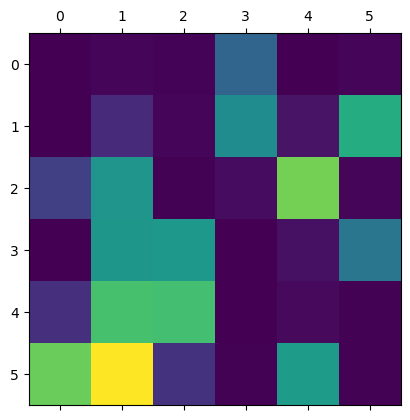

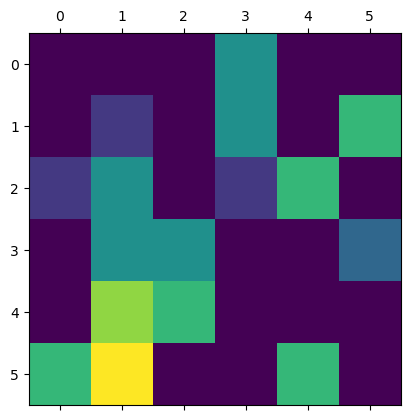

In [113]:
plt.matshow(predicted_matrices[6].detach().numpy())
plt.matshow(matrix_val[6].detach().numpy())


Couple things to do - need to go back to Y=W.H and make sure that when shuffeling that H attahced so that i can go back to the actual spectra also. Then can actually check the spectra

nevermind. i gave themodel with answers lol

moving on


In [123]:
import torch 
import torch.nn.functional as Fun
A = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
output = Fun.one_hot(A)
print(output)

tensor([[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]])
